In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def sigmoid(y):
    z = 1 / (1 + np.exp(-y))
    return z

In [3]:
def cost(X,y,w,b):

    m = X.shape[0]
    
    total_cost = 0

    for i in range(m):
        z = sigmoid(np.dot(X[i],w) + b)
        l = (-y[i]) * np.log(z) - (1 - y[i])* np.log(1 - z)
        total_cost += l

    total_cost = total_cost/(m)

    return total_cost

In [4]:
def find_derivatives(X,y,w,b):
    m,n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0

    for i in range(m):
        z = sigmoid(np.dot(X[i],w) + b)
        err = (z - y[i])
        for j in range(n):
            dj_dw[j] += err * X[i,j]

        dj_db += err

    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw,dj_db
    

In [5]:
def find_parameters(X,y, lr = 0.001, max_iterations = 1000):
    
    n = X.shape[1]
    w = np.zeros(n)
    b = 0

    for i in range(max_iterations):

        if(i%(max_iterations/10) == 0):
            print("Iterations: ", i)
            print("Total cost: ", cost(X,y,w,b))

        dj_dw,dj_db = find_derivatives(X,y,w,b)
        w = w - (lr*dj_dw)
        b = b - (lr*dj_db)

    return w,b

In [7]:
df = pd.read_csv("diabetes.csv")
df = df.dropna()
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
X = (df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]).values
print("X: ", X[:10, :])
y = (df[["Outcome"]]).values
print("Y: ", y[:10,:])

X:  [[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]
 [5.000e+00 1.160e+02 7.400e+01 0.000e+00 0.000e+00 2.560e+01 2.010e-01
  3.000e+01]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01]
 [1.000e+01 1.150e+02 0.000e+00 0.000e+00 0.000e+00 3.530e+01 1.340e-01
  2.900e+01]
 [2.000e+00 1.970e+02 7.000e+01 4.500e+01 5.430e+02 3.050e+01 1.580e-01
  5.300e+01]
 [8.000e+00 1.250e+02 9.600e+01 0.000e+00 0.000e+00 0.000e+00 2.320e-01
  5.400e+01]]
Y:  [[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]]


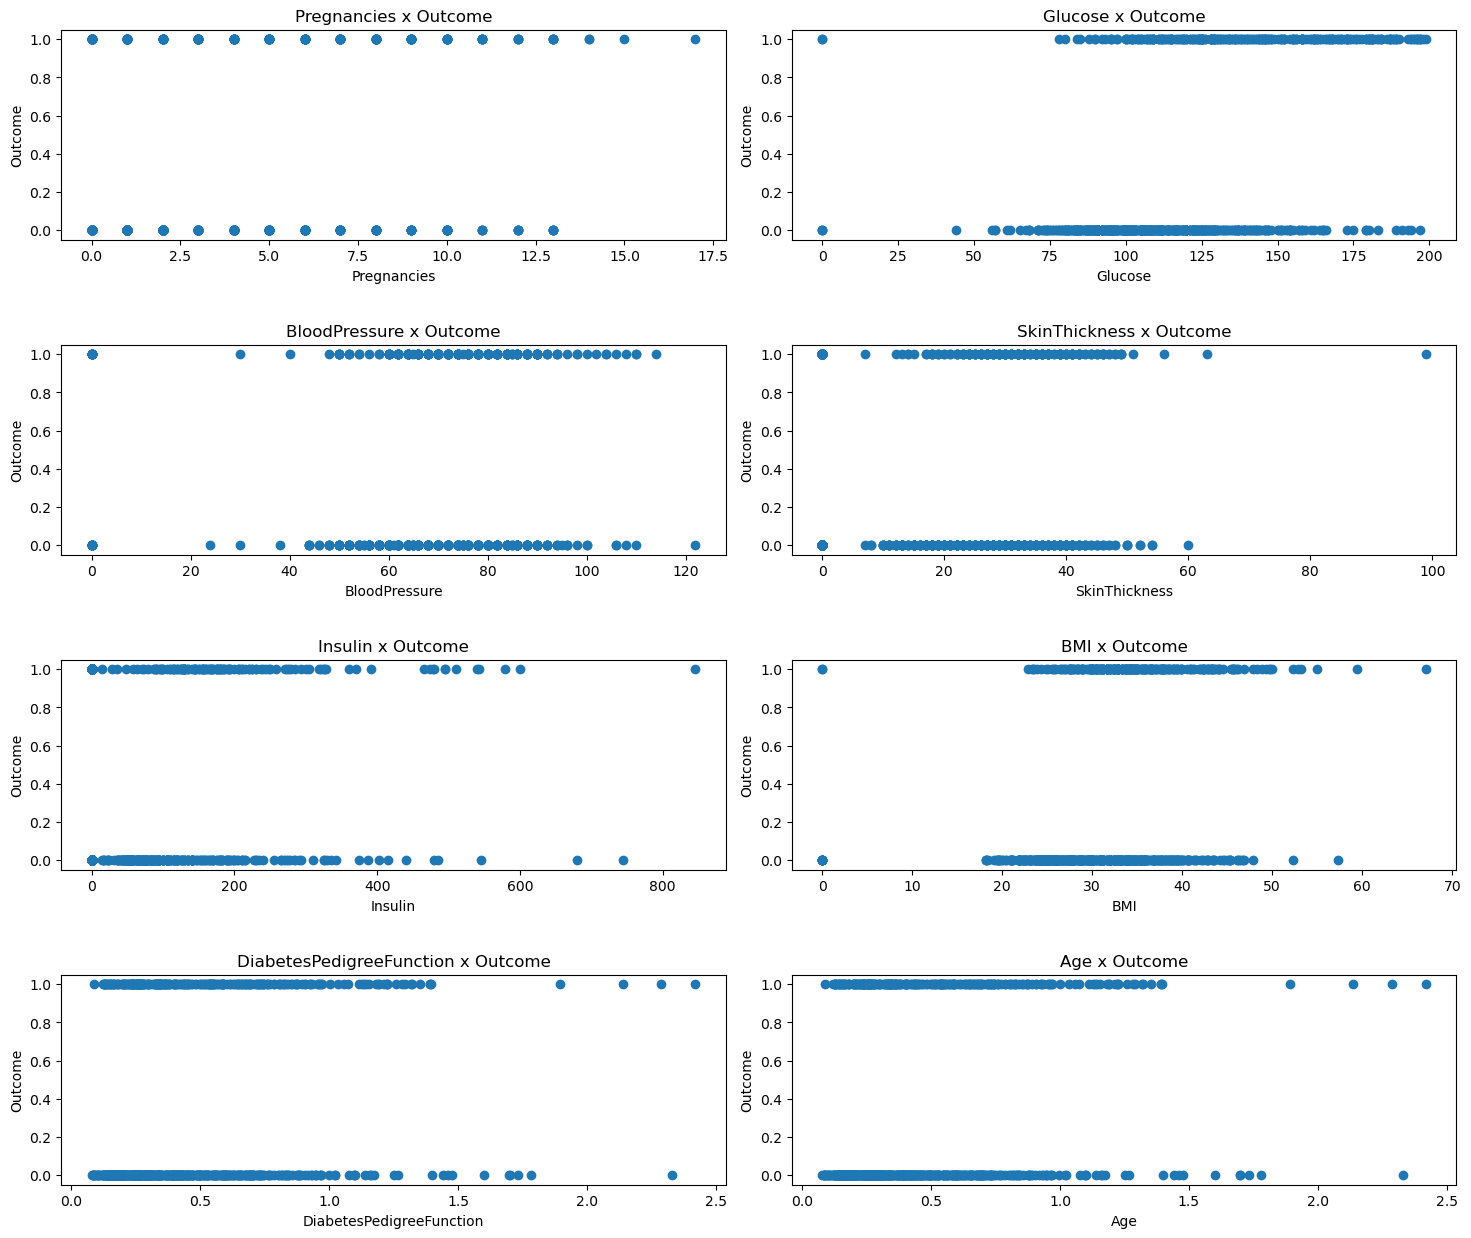

In [10]:
fig, axs = plt.subplots(4, 2, figsize=(18, 15))

axs[0, 0].scatter(X[:,0],y)
axs[0, 0].set_title('Pregnancies x Outcome')
axs[0, 0].set_xlabel("Pregnancies")
axs[0, 0].set_ylabel("Outcome")

axs[0, 1].scatter(X[:,1],y)
axs[0, 1].set_title('Glucose x Outcome')
axs[0, 1].set_xlabel("Glucose")
axs[0, 1].set_ylabel("Outcome")

axs[1, 0].scatter(X[:,2],y)
axs[1, 0].set_title('BloodPressure x Outcome')
axs[1, 0].set_xlabel("BloodPressure")
axs[1, 0].set_ylabel("Outcome")

axs[1, 1].scatter(X[:,3],y)
axs[1, 1].set_title('SkinThickness x Outcome')
axs[1, 1].set_xlabel("SkinThickness")
axs[1, 1].set_ylabel("Outcome")

axs[2, 0].scatter(X[:,4],y)
axs[2, 0].set_title('Insulin x Outcome')
axs[2, 0].set_xlabel("Insulin")
axs[2, 0].set_ylabel("Outcome")

axs[2, 1].scatter(X[:,5],y)
axs[2, 1].set_title('BMI x Outcome')
axs[2, 1].set_xlabel("BMI")
axs[2, 1].set_ylabel("Outcome")

axs[3, 0].scatter(X[:,6],y)
axs[3, 0].set_title('DiabetesPedigreeFunction x Outcome')
axs[3, 0].set_xlabel("DiabetesPedigreeFunction")
axs[3, 0].set_ylabel("Outcome")

axs[3, 1].scatter(X[:,6],y)
axs[3, 1].set_title('Age x Outcome')
axs[3, 1].set_xlabel("Age")
axs[3, 1].set_ylabel("Outcome")

plt.subplots_adjust(wspace=0.1)
plt.subplots_adjust(hspace=0.5)

In [11]:
def normalize_data(X):
    X_c = np.copy(X)
    n = X.shape[1]
    X_max = np.zeros(n)
    
    for i in range(n):
        X_max[i] = X_c[:,i].max()
        X_c[:,i] = X_c[:,i]/X_max[i]

    return X_c, X_max

In [12]:
X_n, X_max= normalize_data(X)
print("X_normalized: ", X_n[0:10,:])
print("Max X values: ", X_max)

X_normalized:  [[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.25909091 0.61728395]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.14504132 0.38271605]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.27768595 0.39506173]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.06900826 0.25925926]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94545455 0.40740741]
 [0.29411765 0.58291457 0.60655738 0.         0.         0.38152012
  0.08305785 0.37037037]
 [0.17647059 0.3919598  0.40983607 0.32323232 0.10401891 0.46199702
  0.10247934 0.32098765]
 [0.58823529 0.57788945 0.         0.         0.         0.52608048
  0.0553719  0.35802469]
 [0.11764706 0.98994975 0.57377049 0.45454545 0.64184397 0.45454545
  0.06528926 0.65432099]
 [0.47058824 0.6281407  0.78688525 0.         0.         0.
  0.09586777 0.66666667]]
Max X values:  [ 17.   199.   122.    99.   846.    67.1    2.

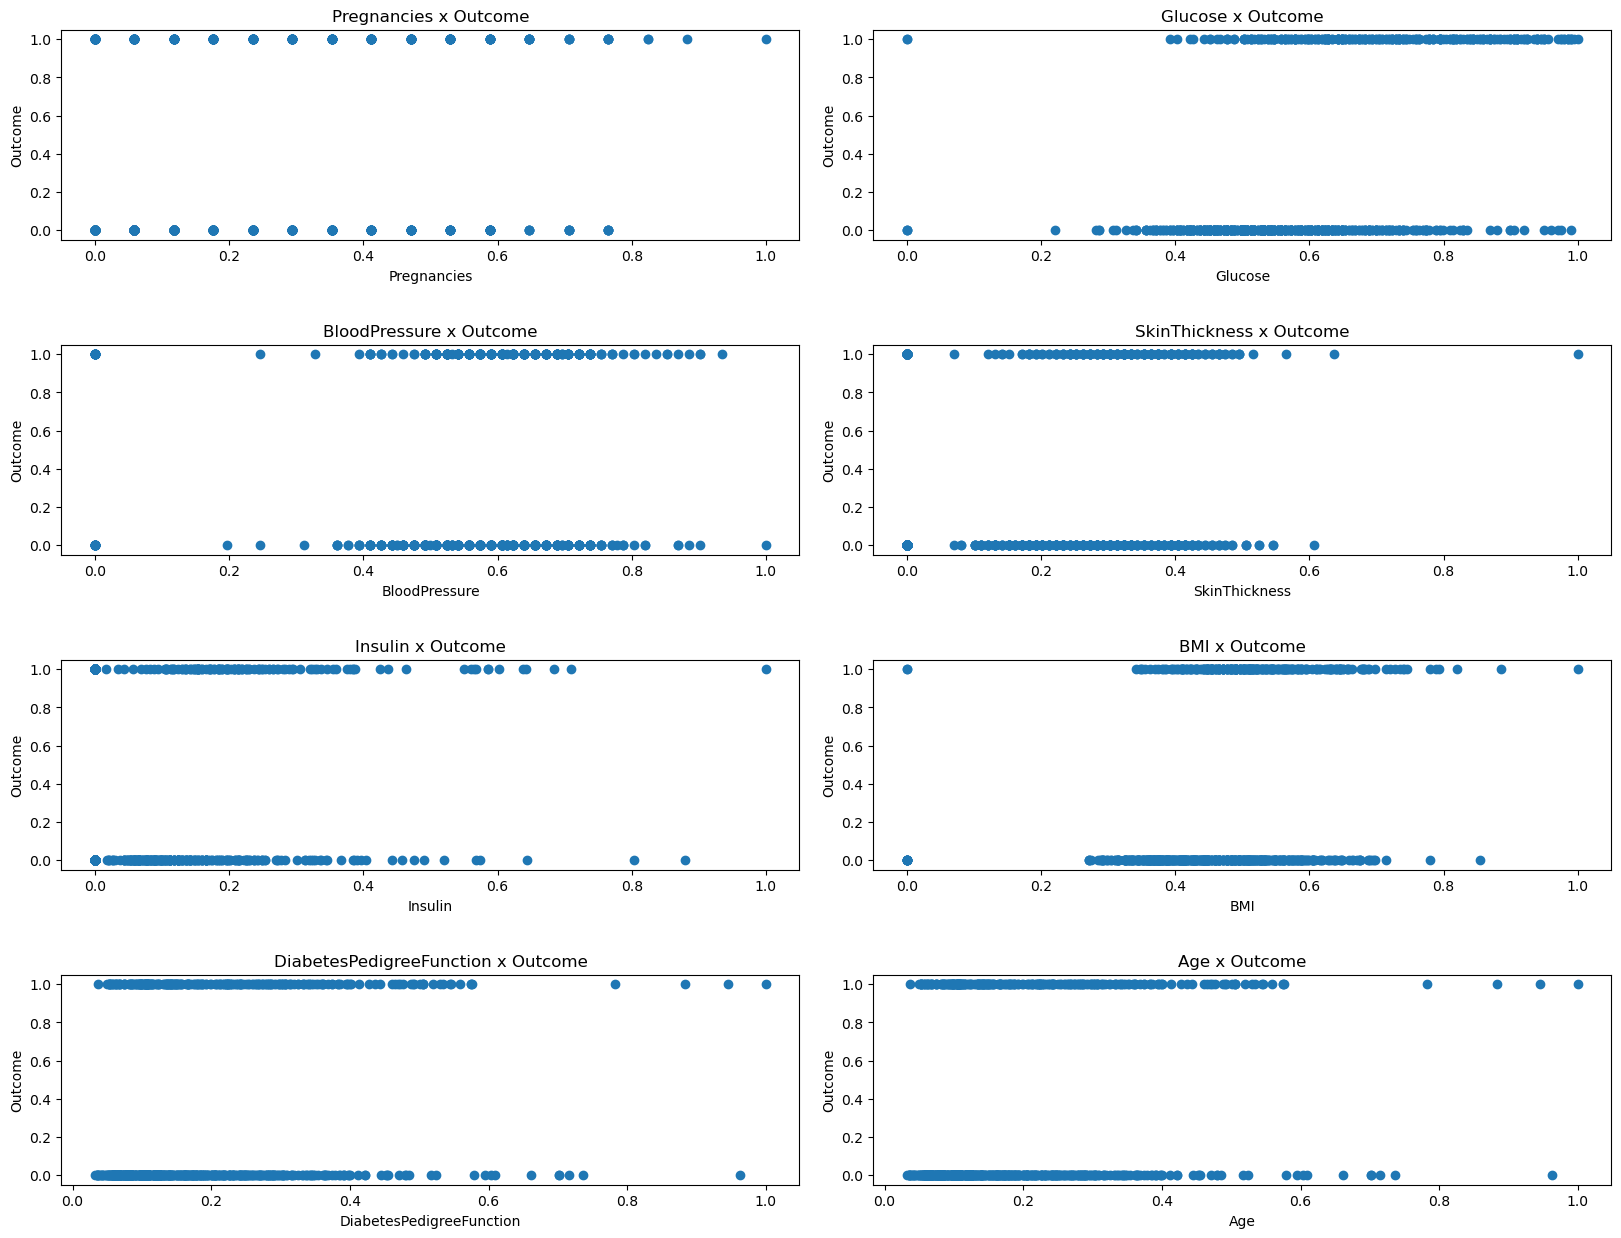

In [13]:
fig, axs = plt.subplots(4, 2, figsize=(20, 15))

axs[0, 0].scatter(X_n[:,0],y)
axs[0, 0].set_title('Pregnancies x Outcome')
axs[0, 0].set_xlabel("Pregnancies")
axs[0, 0].set_ylabel("Outcome")

axs[0, 1].scatter(X_n[:,1],y)
axs[0, 1].set_title('Glucose x Outcome')
axs[0, 1].set_xlabel("Glucose")
axs[0, 1].set_ylabel("Outcome")

axs[1, 0].scatter(X_n[:,2],y)
axs[1, 0].set_title('BloodPressure x Outcome')
axs[1, 0].set_xlabel("BloodPressure")
axs[1, 0].set_ylabel("Outcome")

axs[1, 1].scatter(X_n[:,3],y)
axs[1, 1].set_title('SkinThickness x Outcome')
axs[1, 1].set_xlabel("SkinThickness")
axs[1, 1].set_ylabel("Outcome")

axs[2, 0].scatter(X_n[:,4],y)
axs[2, 0].set_title('Insulin x Outcome')
axs[2, 0].set_xlabel("Insulin")
axs[2, 0].set_ylabel("Outcome")

axs[2, 1].scatter(X_n[:,5],y)
axs[2, 1].set_title('BMI x Outcome')
axs[2, 1].set_xlabel("BMI")
axs[2, 1].set_ylabel("Outcome")

axs[3, 0].scatter(X_n[:,6],y)
axs[3, 0].set_title('DiabetesPedigreeFunction x Outcome')
axs[3, 0].set_xlabel("DiabetesPedigreeFunction")
axs[3, 0].set_ylabel("Outcome")

axs[3, 1].scatter(X_n[:,6],y)
axs[3, 1].set_title('Age x Outcome')
axs[3, 1].set_xlabel("Age")
axs[3, 1].set_ylabel("Outcome")

plt.subplots_adjust(wspace=0.1)
plt.subplots_adjust(hspace=0.5)

In [27]:
w,b = find_parameters(X_n,y, lr = 0.1, max_iterations = 10000)
print("W: ", w)
print("B: ", b)

Iterations:  0
Total cost:  [0.69314718]


/tmp/ipykernel_782/2954616139.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] += err * X[i,j]


Iterations:  1000
Total cost:  [0.56355776]
Iterations:  2000
Total cost:  [0.52601448]
Iterations:  3000
Total cost:  [0.50720756]
Iterations:  4000
Total cost:  [0.4962551]
Iterations:  5000
Total cost:  [0.48926682]
Iterations:  6000
Total cost:  [0.48453877]
Iterations:  7000
Total cost:  [0.48121078]
Iterations:  8000
Total cost:  [0.47880181]
Iterations:  9000
Total cost:  [0.47702183]
W:  [ 1.96370461  6.01768146 -1.43687152  0.15249797 -0.32056171  3.98458291
  1.90638909  1.0299644 ]
B:  [-6.77829331]


In [28]:
def prediction(x,w,b,X_max):
    x_c = np.copy(x)
    n = x.shape[0]
    for j in range(n):
        x_c[j] = x_c[j]/X_max[j]
    predction = sigmoid(np.dot(x_c,w) + b)
    return predction

In [83]:
def show_predction_err(X,y,w,b,X_max,quant):
    quant_of_errors = 0
    m,n = X.shape
    y_predction = np.zeros(m)
    for i in range(m):
        
        z_prediction = prediction(X[i],w,b,X_max)
        
        if(z_prediction >= 0.5):
            y_predction[i] = 1
        else:
            y_predction[i] = 0
            
        if(y_predction[i] != y[i]):
            quant_of_errors+=1

    print("Quantity of errors: %d out of %d" %(quant_of_errors,m))
    print("Error rate: %.2f %%" %(100*quant_of_errors/m))

    x_samples = np.arange(0,m)
    plt.figure(figsize=(20, 1))
    plt.scatter(x_samples[:quant], y[:quant], color = "blue", marker = "s",label = "real")
    plt.scatter(x_samples[:quant],y_predction[:quant], color = "red", marker = "+", label = "predction")
    plt.xlabel("samples")
    plt.ylabel("Outcome")
    plt.legend()
    plt.show()

Quantity of errors: 170 out of 768
Error rate: 22.14 %


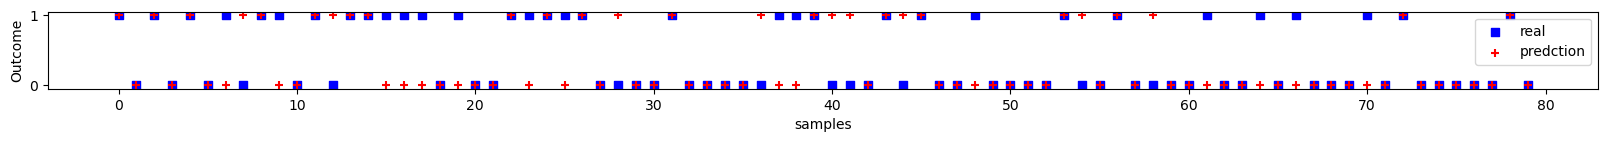

In [84]:
show_predction_err(X,y,w,b,X_max,80)